In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from hyperopt import Trials,STATUS_OK,tpe
from hyperas import optim
from hyperas.distributions import choice,uniform
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
os.listdir()

['train_labels.csv',
 '.DS_Store',
 'Untitled.ipynb',
 'Train_data_processed.csv',
 'test_Bh8pGW3',
 '.ipynb_checkpoints',
 'train_DETg9GD',
 'validation_lables.csv',
 'Validation_data_processed.csv']

In [3]:
train_data=pd.read_csv('train_DETg9GD/train.csv')
print(len(train_data))

19906


In [4]:
train_images=[]
for i in train_data['ID']:
    img=cv2.imread(str('train_DETg9GD/Train/'+i))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    train_images.append(cv2.resize(img,(30,30)))

In [5]:
 len(train_images)

19906

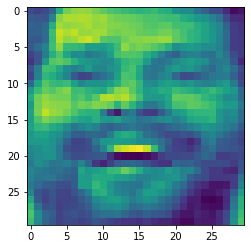

In [6]:
plt.imshow(train_images[0])

In [7]:
train_data.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [8]:
test_data=pd.read_csv('test_Bh8pGW3/test.csv')
print(len(test_data))

6636


In [9]:
test_images=[]
for i in test_data['ID']:
    img=cv2.imread(str('test_Bh8pGW3/Test/'+i))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    test_images.append(cv2.resize(img,(30,30)))

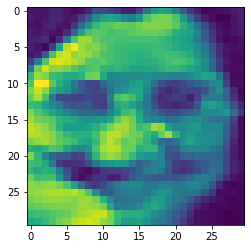

In [10]:
plt.imshow(test_images[0])

In [11]:
train_images=pd.DataFrame(np.asarray(train_images).reshape(-1,900))

In [12]:
train_images['Class']=train_data['Class']
train_images['Class']=train_images['Class'].replace({'MIDDLE':0,'YOUNG':1,'OLD':2})

In [13]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,Class
0,46,40,45,64,121,155,164,166,164,156,...,6,6,18,16,16,26,48,99,141,0
1,36,36,36,33,28,27,27,27,39,54,...,78,79,67,66,86,91,79,65,49,1
2,39,42,47,69,205,196,184,190,207,246,...,64,63,62,62,62,61,63,66,69,0
3,21,21,21,21,20,20,19,20,21,20,...,236,202,101,47,53,67,64,67,60,1
4,21,18,11,21,27,37,26,77,120,138,...,108,123,125,95,54,49,18,10,10,0


In [14]:
test_images=pd.DataFrame(np.asarray(test_images).reshape(-1,900))

In [15]:
X=train_images.drop('Class',axis=1)
y=np.asarray(train_images['Class'])

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [17]:
X_train=np.asarray(X_train).reshape(-1,30,30,1)
X_train=X_train/255.0
X_test=np.asarray(X_test).reshape(-1,30,30,1)
X_test=X_test/255.0

In [18]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(14929, 30, 30, 1) (14929,)
(4977, 30, 30, 1) (4977,)


In [19]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(5,5),input_shape=(30,30,1),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    tf.keras.layers.Conv2D(64,(5,5), activation=tf.nn.relu,padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,(5,5), activation=tf.nn.relu,padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (5,5), activation=tf.nn.relu,padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
    
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
z=model.fit(x=X_train,y=y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))

Train on 14929 samples, validate on 4977 samples
Epoch 1/10
14929/14929 - 55s - loss: 0.9158 - accuracy: 0.5558 - val_loss: 0.8318 - val_accuracy: 0.5953
Epoch 2/10
14929/14929 - 57s - loss: 0.8193 - accuracy: 0.6259 - val_loss: 0.7623 - val_accuracy: 0.6620
Epoch 3/10
14929/14929 - 56s - loss: 0.7806 - accuracy: 0.6522 - val_loss: 0.7233 - val_accuracy: 0.6743
Epoch 4/10
14929/14929 - 55s - loss: 0.7558 - accuracy: 0.6694 - val_loss: 0.7068 - val_accuracy: 0.6837
Epoch 5/10
14929/14929 - 55s - loss: 0.7228 - accuracy: 0.6826 - val_loss: 0.7131 - val_accuracy: 0.6799
Epoch 6/10
14929/14929 - 55s - loss: 0.7010 - accuracy: 0.6933 - val_loss: 0.6689 - val_accuracy: 0.7016
Epoch 7/10
14929/14929 - 55s - loss: 0.6823 - accuracy: 0.7063 - val_loss: 0.6593 - val_accuracy: 0.7008
Epoch 8/10
14929/14929 - 55s - loss: 0.6596 - accuracy: 0.7129 - val_loss: 0.6590 - val_accuracy: 0.7067
Epoch 9/10
14929/14929 - 55s - loss: 0.6408 - accuracy: 0.7183 - val_loss: 0.6502 - val_accuracy: 0.7129
Epoch 

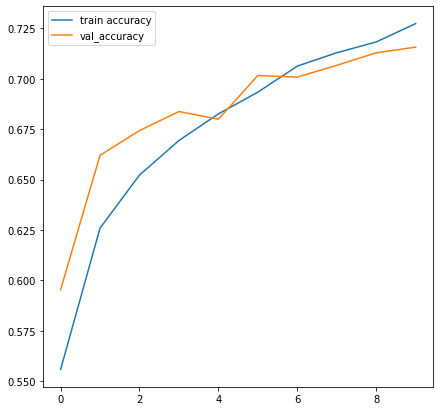

In [23]:
plt.figure(figsize=(7,7))
plt.plot(z.history['accuracy'],label='train accuracy')
plt.plot(z.history['val_accuracy'],label='val_accuracy')
plt.legend()